<a href="https://colab.research.google.com/github/fathanick/Fundamentals-of-Data-Science/blob/main/01_Discrete_RV_Tutorial_PMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discrete Random Variables Tutorial (PMF) — Colab Notebook

This notebook contains **student-friendly code** for five discrete random variable problems using **SciPy**.
Each section includes a brief explanation, the **PMF**, and code to compute required probabilities.

## Libraries used
- **NumPy (`numpy`)**: arrays and simple numeric utilities.
- **Matplotlib (`matplotlib.pyplot`)**: quick visual checks (optional plots).
- **SciPy Stats (`scipy.stats`)**: probability distributions:
  - `.pmf(k)` — Probability Mass Function, i.e., $P(X=k)$.
  - `.cdf(k)` — Cumulative distribution, $P(X\le k)$ ("at most").
  - `.sf(k)`  — Survival function, $P(X > k)$ ("greater than").
  - `.mean()`, `.var()` — theoretical expectation and variance.

> If you're on **Google Colab**, run the setup cell next. If SciPy is already available, you can skip installation.

In [1]:
# Uncomment in a fresh Colab runtime if needed:
# !pip install numpy scipy matplotlib

import numpy as np
import math
import matplotlib.pyplot as plt
from math import comb
from scipy.stats import randint, bernoulli, binom, geom, poisson
print('Versions -> numpy:', np.__version__)

Versions -> numpy: 2.0.2


## 1) Uniform Distribution — Fair Spinner (1–5)
**Problem**: A fair spinner has 5 equal sectors numbered 1,2,3,4,5. Let $X$ be the number obtained after one spin.

**PMF**: $P(X=x)=\tfrac{1}{5}$ for $x\in\{1,2,3,4,5\}$; otherwise 0.

**Compute**: $P(X>3) = P(X=4)+P(X=5) = \tfrac{2}{5} = 0.4$.


PMF:
 P(X=1) = 0.200
 P(X=2) = 0.200
 P(X=3) = 0.200
 P(X=4) = 0.200
 P(X=5) = 0.200

P(X>3) via sf  = 0.4
P(X>3) via sum = 0.4


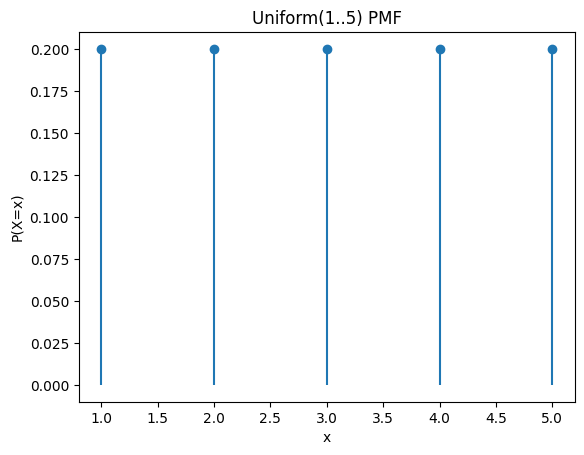

In [2]:
# Discrete uniform over integers {1,2,3,4,5} -> randint(low=1, high=6)
rv_u = randint(1, 6)

# PMF table
xs = np.arange(1, 6)
pmf = rv_u.pmf(xs)
print('PMF:')
for x, p in zip(xs, pmf):
    print(f' P(X={x}) = {p:.3f}')

# P(X > 3) two ways
p_gt_3_sf = rv_u.sf(3)              # survival function = P(X>3)
p_gt_3_sum = rv_u.pmf(4) + rv_u.pmf(5)
print('\nP(X>3) via sf  =', p_gt_3_sf)
print('P(X>3) via sum =', p_gt_3_sum)

# Optional visualization (Matplotlib only, single plot)
plt.stem(xs, pmf, basefmt=' ')
plt.title('Uniform(1..5) PMF')
plt.xlabel('x'); plt.ylabel('P(X=x)')
plt.show()

## 2) Bernoulli Distribution — Medical Test Correctness
**Problem**: A medical test identifies the disease correctly with probability $p=0.9$. Let $X=1$ if the test is correct, and $X=0$ otherwise.

**PMF**: $P(X=1)=p=0.9$, $P(X=0)=1-p=0.1$.

**Expectation**: $E[X]=p=0.9$.


In [3]:
p = 0.9
rv_b = bernoulli(p)

print('PMF:')
for x in [0, 1]:
    print(f' P(X={x}) = {rv_b.pmf(x):.3f}')

print('\nE[X] theoretical =', rv_b.mean())

# Optional: simulate to verify E[X]
sim = rv_b.rvs(size=20000, random_state=42)
print('E[X] empirical   =', sim.mean())

PMF:
 P(X=0) = 0.100
 P(X=1) = 0.900

E[X] theoretical = 0.9
E[X] empirical   = 0.9009


## 3) Binomial Distribution — Marketing Email Opens
**Problem**: Each email has a 20% chance to be opened. For 6 emails, let $Y$ be the number opened.

**Distribution**: $Y\sim\text{Binomial}(n=6, p=0.2)$.

**Compute**: $P(Y=2)=\binom{6}{2}(0.2)^2(0.8)^4$.


Y ~ Binomial(n=6, p=0.2)
P(Y=2) (SciPy):  0.2457600000000002
P(Y=2) (manual): 0.2457600000000001


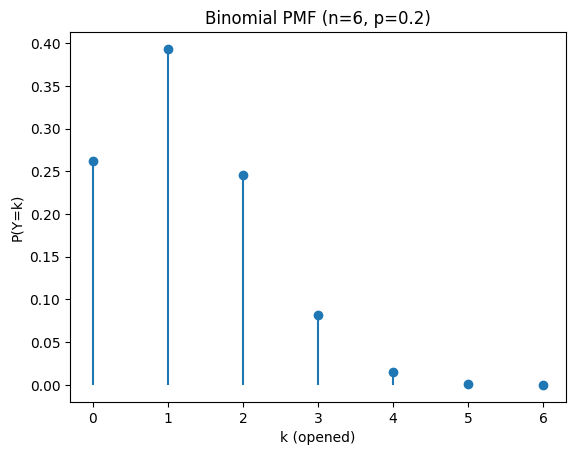

In [4]:
n, p = 6, 0.2
rv_bin = binom(n, p)

p_y_eq_2 = rv_bin.pmf(2)
p_manual = comb(6, 2) * (0.2**2) * (0.8**4)
print('Y ~ Binomial(n=6, p=0.2)')
print('P(Y=2) (SciPy): ', p_y_eq_2)
print('P(Y=2) (manual):', p_manual)

# Optional visualization (single plot)
xs = np.arange(0, n+1)
pmf = rv_bin.pmf(xs)
plt.stem(xs, pmf, basefmt=' ')
plt.title('Binomial PMF (n=6, p=0.2)')
plt.xlabel('k (opened)'); plt.ylabel('P(Y=k)')
plt.show()

## 4) Geometric Distribution — Rounds Until First Win
**Problem**: A gamer wins each round with probability $p=0.3$ (independent rounds). Let $Z$ be the **number of rounds until the first win**.

**SciPy convention**: `geom(p)` counts the **trial number** of the first success, so support is $\{1,2,3,\dots\}$.

**Compute**: $P(Z=4)=(1-p)^{4-1}p=(0.7)^3(0.3)$.


P(Z=4) (SciPy):  0.10289999999999998
P(Z=4) (manual): 0.10289999999999998


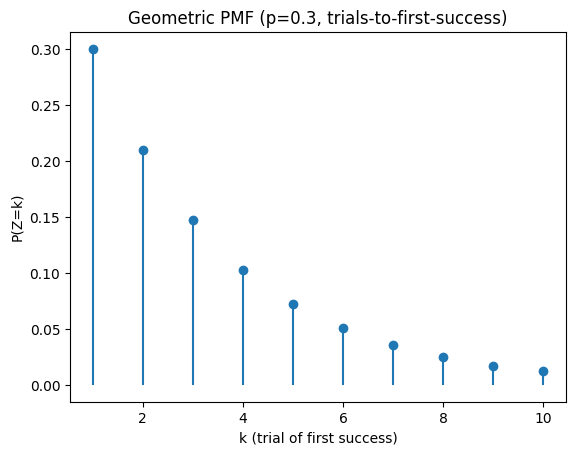

In [5]:
p = 0.3
rv_geo = geom(p)

p_z_eq_4 = rv_geo.pmf(4)
p_manual = (1-p)**(4-1) * p
print('P(Z=4) (SciPy): ', p_z_eq_4)
print('P(Z=4) (manual):', p_manual)

# Optional: show first 10 PMF values
xs = np.arange(1, 11)
pmf = rv_geo.pmf(xs)
plt.stem(xs, pmf, basefmt=' ')
plt.title('Geometric PMF (p=0.3, trials-to-first-success)')
plt.xlabel('k (trial of first success)'); plt.ylabel('P(Z=k)')
plt.show()

## 5) Poisson Distribution — Café Arrivals
**Problem**: Customers arrive with mean $\lambda=3$ per 10 minutes. Let $X$ be the number in a 10‑minute interval.

Compute:
- Exactly 5 customers: $P(X=5)$ using `pmf(5)`.
- At most 2 customers: $P(X\le 2)$ using `cdf(2)`.


P(X=5):  0.10081881344492458
P(X<=2): 0.42319008112684364


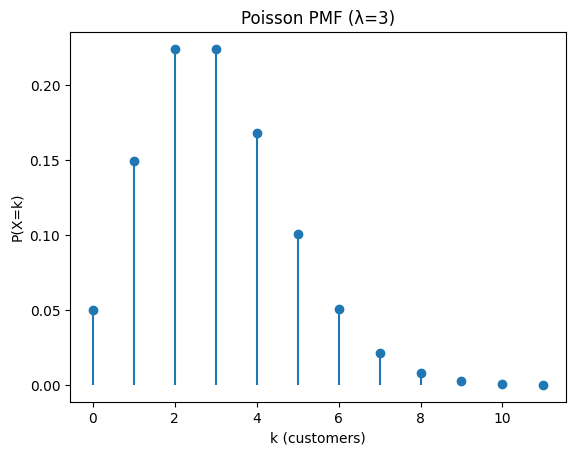

In [6]:
lam = 3
rv_poi = poisson(mu=lam)

p_eq_5 = rv_poi.pmf(5)
p_le_2 = rv_poi.cdf(2)
print('P(X=5): ', p_eq_5)
print('P(X<=2):', p_le_2)

# Optional visualization
xs = np.arange(0, 12)
pmf = rv_poi.pmf(xs)
plt.stem(xs, pmf, basefmt=' ')
plt.title('Poisson PMF (λ=3)')
plt.xlabel('k (customers)'); plt.ylabel('P(X=k)')
plt.show()

## ✅ Summary & Tips
- Use **`.pmf(k)`** for exact probabilities of discrete RVs.
- **At most** is `cdf(k)`, **greater than** is `sf(k)`.
- Know each support and parameter:
  - `randint(a,b)`: integers in `[a, b-1]`.
  - `bernoulli(p)`: values in `{0,1}`.
  - `binom(n,p)`: `0..n` successes.
  - `geom(p)`: **trials** until first success: `1,2,...`.
  - `poisson(λ)`: counts `0,1,2,...` with mean = variance = `λ`.

### Practice prompts
1. For the spinner, compute `P(2 ≤ X ≤ 4)` using `cdf` and by summing `pmf`.
2. For Bernoulli with `p=0.7`, simulate 50,000 trials and compare empirical vs theoretical mean.
3. For Binomial with `n=10, p=0.5`, compute `P(Y≥7)`.
4. For Geometric with `p=0.1`, compute `P(Z>5)` via `sf`.
5. For Poisson with `λ=1.5`, plot the PMF for `k=0..10` and note the mode.
